In [79]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df1=pd.read_csv("train.csv")

In [6]:
print(df1.shape,df1.index,df1.columns)

(6368, 15) RangeIndex(start=0, stop=6368, step=1) Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')


In [36]:
df1.head(10)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
5,SHIECAYW3VZWGZGX,23.0,2015-09-25 16:31:46.000,162,Brilee,No,Technology,1,49,0.0,633.0,6.0,3959.0,6104.0,5631.247872
6,SHOE4FZGGTE7HJXN,33.0,2014-12-08 12:25:52.000,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992
7,SHOE6QGAYFFMBWG6,4.0,2015-09-22 14:29:06.000,23,Koby,Yes,Educational,1,67,0.0,104.0,15.0,3596.0,5921.0,4820.943600
8,KRTEBSMKCGFESHYX,26.0,2016-03-28 21:48:01.000,156,Tiffani,Yes,Child_care,0,53,0.0,310.0,6.0,6965.0,10194.0,8837.724240
9,BRAE3P8Y8UVRY43K,5.0,2015-08-19 22:16:52.000,275,Nigel,Yes,Child_care,0,84,1.0,321.0,8.0,1103.0,5430.0,530.761862


In [8]:
 df1.isnull().sum()
    

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [41]:
df1[df1['Selling_Price'].isnull()&df1['Minimum_price']&df1['Maximum_price']].shape

(39, 15)

In [40]:
df1[df1['Selling_Price'].isnull()&df1['Minimum_price']].shape

(41, 15)

In [39]:
df1[df1['Selling_Price'].isnull()&df1['Maximum_price'].isnull()].shape

(2, 15)

In [46]:
df1[df1['Loyalty_customer']=="Yes"].shape[0]/df1.shape[0]

0.6103957286432161

In [69]:
df1['Market_Category'].value_counts()


23     326
452    323
358    271
55     249
3      239
      ... 
206      1
210      1
214      1
18       1
217      1
Name: Market_Category, Length: 248, dtype: int64

In [70]:
df1['Discount_avail'].value_counts()

0.0    5441
1.0     889
Name: Discount_avail, dtype: int64

In [73]:
data=df1[['Product_id', 'Stall_no', 'Market_Category','Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price']]

In [75]:
data

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,WATE7VE2D62VEKW8,17.0,24,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,SHOEF9G8Z4ZXF6WE,21.0,55,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,PBXEB9ZQ7HHCFXYG,36.0,358,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,NKCEAGXHRYTNTMG7,27.0,452,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [76]:
data.isnull().sum()

Product_id            0
Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

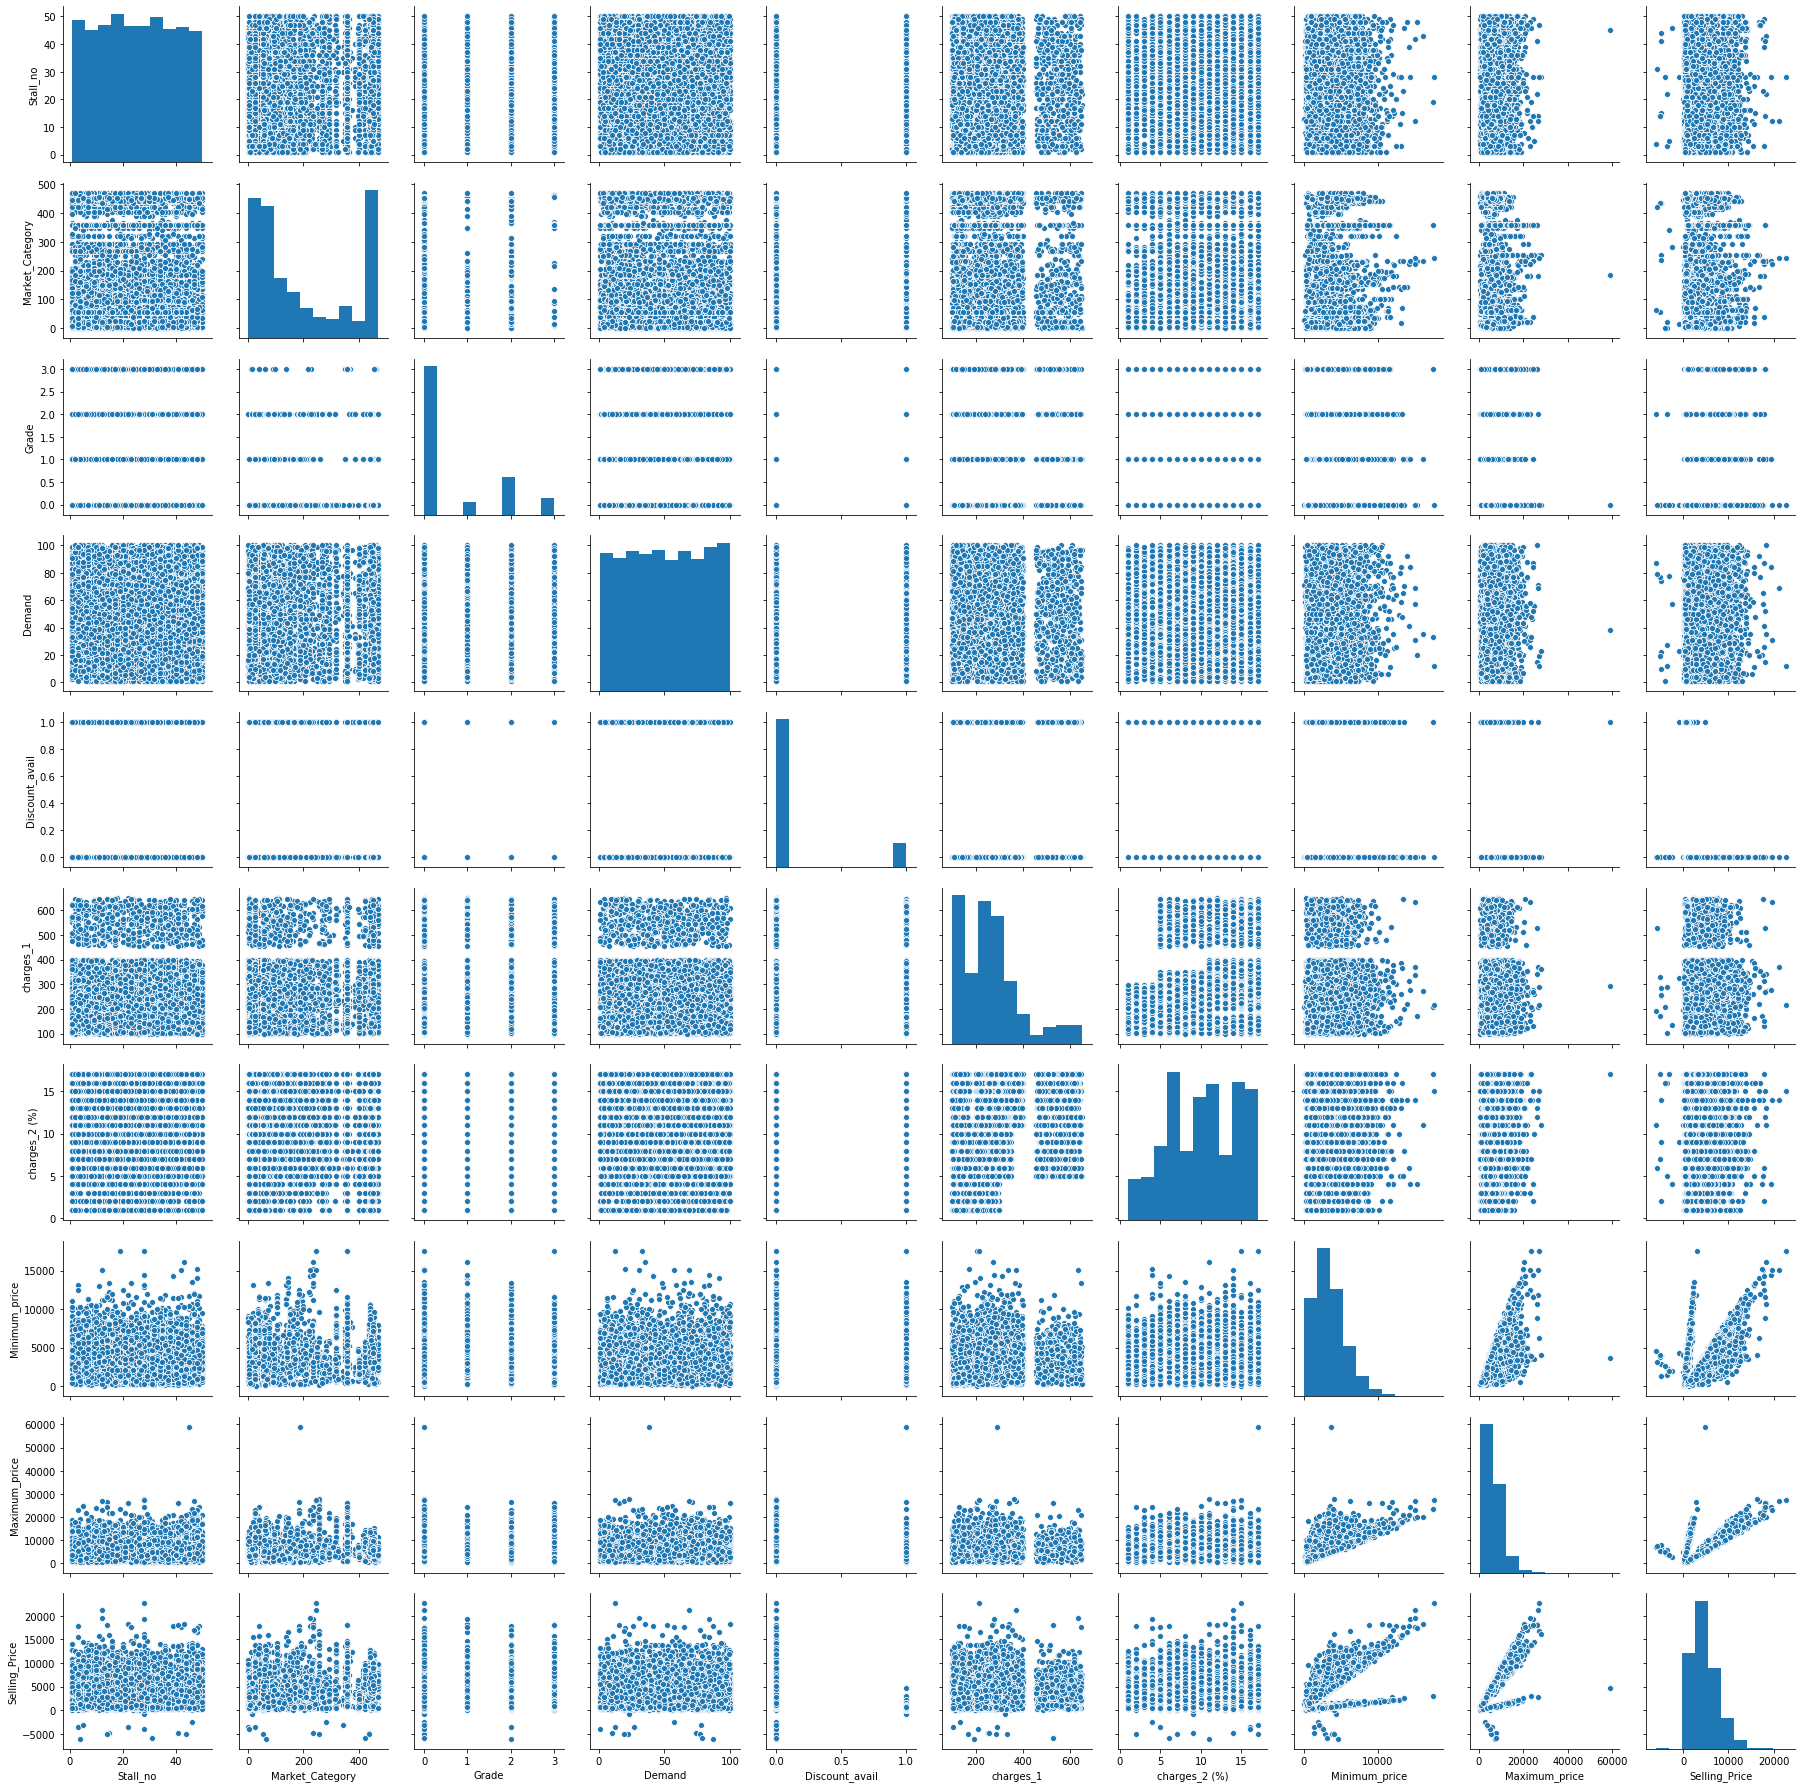

In [78]:
sns.pairplot(data)

SyntaxError: invalid syntax (<ipython-input-16-b8d13dc3286a>, line 1)